# Восстановление уравнения Бургерса по табличным данным

In [27]:
import numpy as np
from kan import *
import matplotlib.pyplot as plt

data = np.load("Burgers.npz")
print(list(data.keys())) 
t, x, u = data["t"], data["x"], data["usol"]

['t', 'x', 'usol']


In [28]:
t = t.flatten()  # (100,)
x = x.flatten()  # (256,)

In [29]:
print("t shape:", t.shape)
print("x shape:", x.shape)
print("u shape:", u.shape)

t shape: (100,)
x shape: (256,)
u shape: (256, 100)


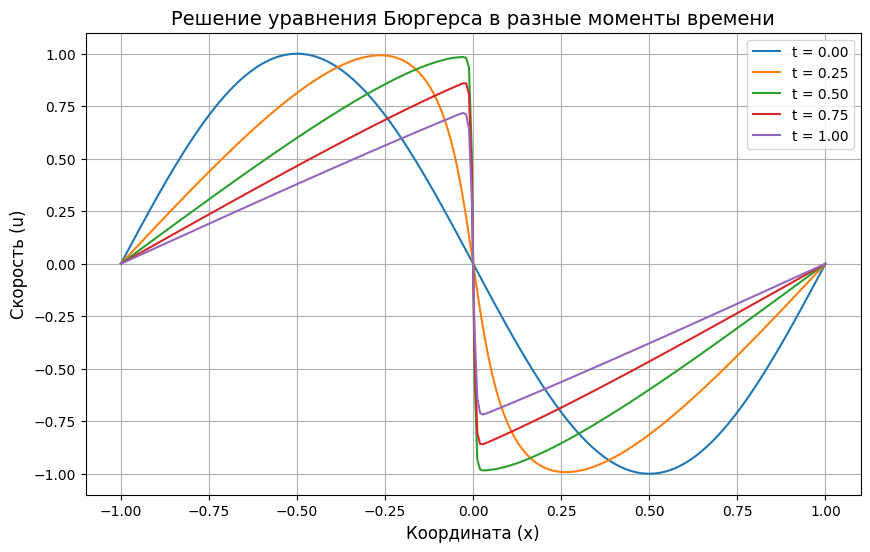

In [30]:
plt.figure(figsize=(10, 6))
times = [0.0, 0.25, 0.5, 0.75, 1.0]

for time in times:
    # Находим индекс времени
    idx = np.where(np.isclose(t, time, atol=1e-2))[0][0]
    # Берем столбец u для фиксированного времени (длина 256)
    plt.plot(x, u[:, idx], label=f"t = {time:.2f}")

plt.xlabel("Координата (x)", fontsize=12)
plt.ylabel("Скорость (u)", fontsize=12)
plt.title("Решение уравнения Бюргерса в разные моменты времени", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

In [31]:
t_grid, x_grid = np.meshgrid(t, x, indexing='xy')  # t: (100,), x: (256,) -> (256, 100)
X = np.vstack([t_grid.flatten(), x_grid.flatten()]).T  # Форма: (256*100, 2), [t, x]
y = u.flatten()  # Форма: (256*100,), значения u

# Проверка размеров
print("X shape:", X.shape)  # (25600, 2)
print("y shape:", y.shape)

X shape: (25600, 2)
y shape: (25600,)


In [32]:
X_normalized = X.copy()
X_normalized[:, 0] = (X[:, 0] - t.min()) / (t.max() - t.min())
X_normalized[:, 1] = (X[:, 1] - x.min()) / (x.max() - x.min())

print("X norm shape:", X_normalized.shape)

X norm shape: (25600, 2)


In [33]:
model = KAN(width=[2, 50, 20, 1], grid=10, k=3)

checkpoint directory created: ./model
saving model version 0.0


In [34]:
model({'train_input': X_normalized});
model.plot(beta=100)

KeyError: (slice(None, None, None), tensor([0, 1]))

In [ ]:
model.fit({'train_input': X_normalized, 'train_label': y}, opt="LBFGS", steps=100, lamb=0.01)

TypeError: Module.train() got an unexpected keyword argument 'opt'